# Homework 7

Write a program which does thinning on a downsampled image (lena.bmp).

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Binarize(img):
    new_img = img.copy()
    for i in range(512):
        for j in range(512):
            if img[i][j] < 128:
                new_img[i][j] = 0
            else:
                new_img[i][j] = 255
    return new_img

In [3]:
def DownSampling(img):
    new_img = np.zeros([64, 64], dtype=img.dtype)
    for i in range(64):
        new_img[i] = img[i*8][0:512:8]

    #set border into 0
    new_img = np.insert(new_img, 0, 0, axis=0)
    new_img = np.insert(new_img, 65, 0, axis=0)
    new_img = np.insert(new_img, 0, 0, axis=1)
    new_img = np.insert(new_img, 65, 0, axis=1)

    return new_img

In [4]:
def Yokoi_h(b, c, d, e):
    if b == c:
        if d == b and e == b:
            return 'r'
        else:
            return 'q'
    else:
        return 's'

def Yokoi_f(a):
    if (a[0] == 'r' and a[1] == 'r' and a[2] == 'r' and a[3] == 'r'):
        return 5
    count = 0
    for i in range(4):
        if a[i] == 'q':
            count += 1
    return count
    
def Yokoi(img):
    out = np.zeros((66, 66))
    a = ['', '', '', '']
    for i in range(1, 65):
        for j in range(1, 65):
            if img[i][j] == 255:
                a[0] = Yokoi_h(img[i][j], img[i][j+1], img[i-1][j+1], img[i-1][j])
                a[1] = Yokoi_h(img[i][j], img[i-1][j], img[i-1][j-1], img[i][j-1])
                a[2] = Yokoi_h(img[i][j], img[i][j-1], img[i+1][j-1], img[i+1][j])
                a[3] = Yokoi_h(img[i][j], img[i+1][j], img[i+1][j+1], img[i][j+1])
                out[i][j] = Yokoi_f(a)
            else:
                out[i][j] = 6
        out[i][0] = out[i][65] = 6
    out[0][0:66:] = out[65][0:66:] = 6

    return out

In [5]:
def PairRelation(yokoi):
    out = [[''] * 66 for i in range(66)]
    for i in range(1, 65):
        for j in range(1, 65):
            if yokoi[i][j] != 6:
                if yokoi[i][j] == 1 and (yokoi[i-1][j] == 1 or yokoi[i+1][j] == 1 or yokoi[i][j-1] == 1 or yokoi[i][j+1] == 1):
                    out[i][j] = 'p'                   
                else:
                    out[i][j] = 'q'
            else:
                out[i][j] = 'g'
        out[i][0] = out[i][65] = 'g'
    for i in range(66):
        out[0][i] = out[65][i] = 'g'

    return out

In [6]:
def Shrink_h(b, c, d, e):
    if c != 'g' and (d == 'g' or e == 'g'):
        return 1
    return 0

def Shrink_f(a, x):
    sum = 0
    for i in range(4):
        sum += a[i]
    if sum == 1:
        return 'g'
    return x

def Shrink(img):
    out = [[''] * 66 for i in range(66)]
    a = ['', '', '', '']
    for i in range(1, 65):
        for j in range(1, 65):
            if img[i][j] == 'p':
                a[0] = Shrink_h(img[i][j], img[i][j+1], img[i-1][j+1], img[i-1][j])
                a[1] = Shrink_h(img[i][j], img[i-1][j], img[i-1][j-1], img[i][j-1])
                a[2] = Shrink_h(img[i][j], img[i][j-1], img[i+1][j-1], img[i+1][j])
                a[3] = Shrink_h(img[i][j], img[i+1][j], img[i+1][j+1], img[i][j+1])
                img[i][j] = Shrink_f(a, img[i][j])
    for i in range(66):
        for j in range(66):
            if img[i][j] == 'g':
                out[i][j] = 0
            else:
                out[i][j] = 255
    
    return out

In [7]:
def diff(img1, img2):
    for i in range(64):
        for j in range(64):
            if img1[i][j] != img2[i][j]:
                return 1
    return 0

In [8]:
def Thinning(img):
    new_img = np.zeros([64, 64], dtype=img.dtype)

    change = 1
    while change == 1:
        Yokoi_out = Yokoi(img)
        PairRelation_out = PairRelation(Yokoi_out)
        result = Shrink(PairRelation_out)
        change = diff(img, result)
        img = result
    
    for i in range(64):
        for j in range(64):
            if result[i+1][j+1] == 255:
                new_img[i][j] = 255
            else:
                new_img[i][j] = 0
    new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
    plt.imshow(new_img)
    plt.axis('off')
    plt.show()

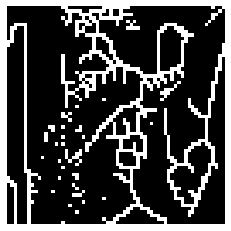

In [9]:
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
Thinning(DownSampling(Binarize(img)))